In [1]:
import meep as mp

In [2]:
cell = mp.Vector3(16,8,0)

In [3]:
geometry = [
    mp.Block(
        mp.Vector3(mp.inf, 1, mp.inf),
        center = mp.Vector3(),
        material = mp.Medium(epsilon = 12)
    )
]

In [4]:
sources = [
    mp.Source(
        mp.ContinuousSource(frequency=0.15), component = mp.Ez, center = mp.Vector3(-7,0)
    )
]

In [5]:
pml_layers = [mp.PML(1.0)]

In [6]:
resolution = 30

In [7]:
sim = mp.Simulation(
    cell_size = cell,
    boundary_layers = pml_layers,
    geometry = geometry,
    sources = sources,
    resolution = resolution
)

     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


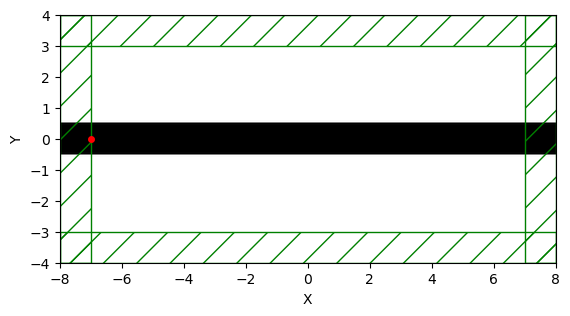

In [8]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.figure(dpi = 100)
sim.plot2D()
plt.show()

In [9]:
sim.run(until = 200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000535965 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.167529 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

Meep progress: 64.26666666666667/200.0 = 32.1% done in 4.0s, 8.5s to go
on time step 3857 (time=64.2833), 0.00103732 s/step
Meep progress: 147.01666666666665/200.0 = 73.5% done in 8.0s, 2.9s to go
on time step 8825 (time=147.083), 0.000805228 s/step
run 0 finished at t = 200.0 (12000 timesteps)


     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


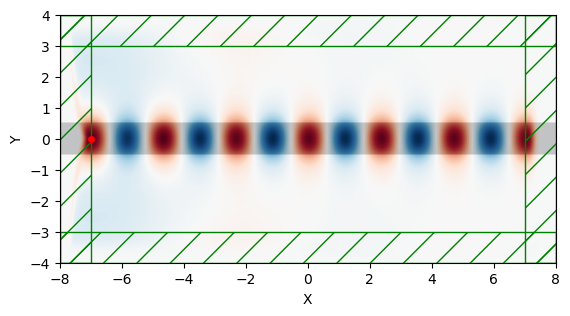

In [10]:
plt.figure(dpi = 100)
sim.plot2D(fields = mp.Ez)
plt.show()

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

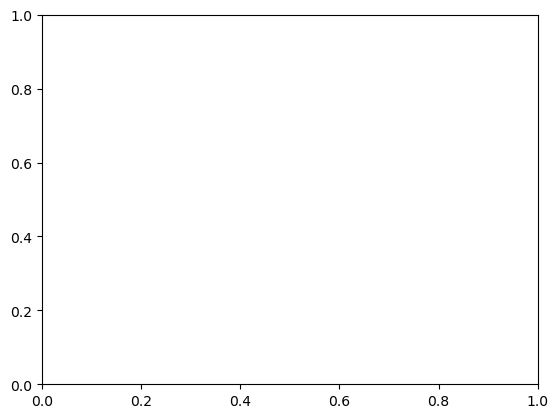

In [11]:
sim.reset_meep()
f = plt.figure(dpi = 100)
Animate = mp.Animate2D(fields = mp.Ez, f = f, realtime = False, normalize = True)
plt.close

In [12]:
sim.run(mp.at_every(1,Animate),until=200)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000403881 s
Working in 2D dimensions.
Computational cell is 16 x 8 x 0 with resolution 30
     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.168503 s
-----------


FloatProgress(value=0.0, description='0% done ', max=200.0)

     block, center = (0,0,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Meep progress: 81.58333333333333/200.0 = 40.8% done in 4.0s, 5.8s to go
on time step 4899 (time=81.65), 0.000816516 s/step
Meep progress: 150.3/200.0 = 75.2% done in 8.0s, 2.6s to go
on time step 9021 (time=150.35), 0.000970554 s/step
Normalizing field data...
run 1 finished at t = 200.0 (12000 timesteps)


In [13]:
import sys
import errno

filename = "straight_waveguide.mp4"
try:
    Animate.to_mp4(20, filename)
except IOError as e:
    if e.errno == errno.EPIPE:
        pass

Generating MP4...


In [14]:
from IPython.display import Video

Video(filename)